# Visualization with Seaborn

### Using the following datasets "flights.csv" dataset contains information about the flights of an airport. Airline "airlines.csv" data holds immense importance as it offers insights into the functioning and efficiency of the aviation industry. It provides valuable information about flight routes, schedules, passenger demographics, and preferences, which airlines can leverage to optimize their operations and enhance customer experiences.

### A) Import the relevant libraries and read the dataset files

### B)Using the same dataset from the previous exercise, density Plot of All Delays Using Seaborn 

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Read in data
flightsdf = pd.read_csv('/home/saja/Desktop/dataAI3/Data.AI3/Review Examples/0.4-Matplotlib/flights.csv')
airlinedf = pd.read_csv('/home/saja/Desktop/dataAI3/Data.AI3/Review Examples/0.4-Matplotlib/airlines.csv')

In [137]:
flightsdf.dropna(inplace=True)
airlinedf.dropna(inplace=True)

In [138]:
flightsdf = flightsdf.merge(airlinedf, how='left', left_on='carrier', right_on='Passenger ID')
flights = flightsdf[['arr_delay', 'name']] 

A) Plot the histogram of Arrival Delays in the datasets

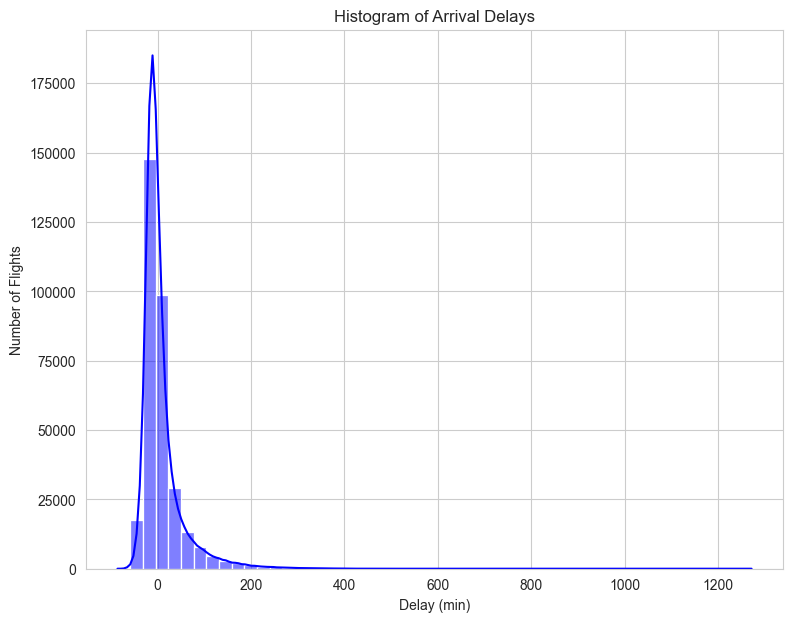

In [139]:
# Set the figure size
plt.figure(figsize=(9, 7))
# Plot using histplot
sns.histplot(flights['arr_delay'], kde=True, bins=50, color='blue')
# Add titles and labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Number of Flights')
# Show plot
plt.show()

A) You should show the Density Plot with Varying Bandwidth Adjustments

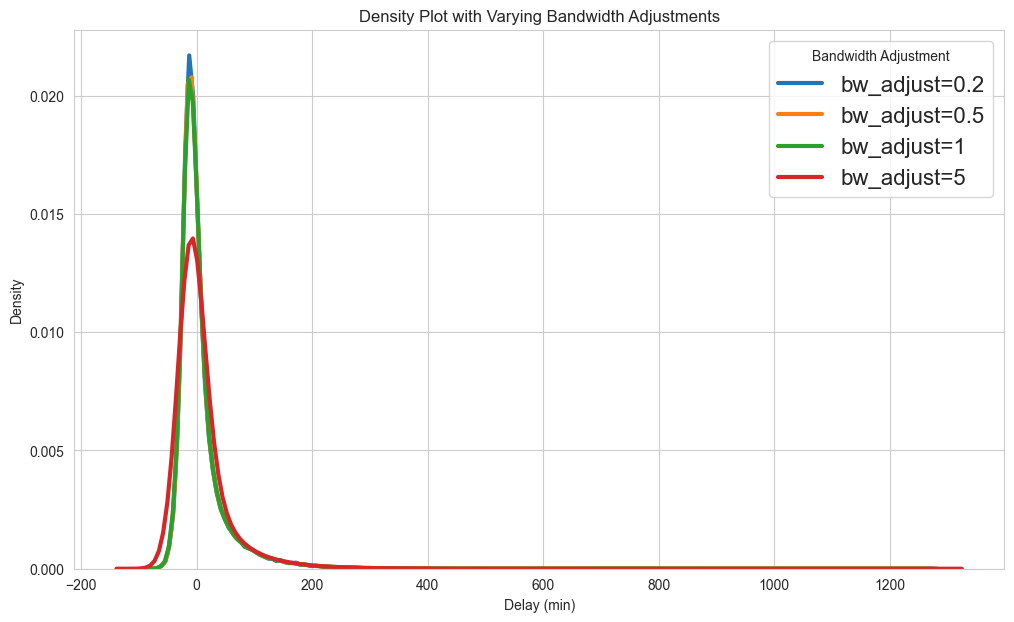

In [132]:
# Set the figure size
plt.figure(figsize=(12, 7))

# Loop through various bandwidth adjustments
for bandwidth_adjust in [0.2, 0.5, 1, 5]:
    sns.kdeplot(flights['arr_delay'], 
                bw_adjust=bandwidth_adjust, 
                linewidth=3, label=f'bw_adjust={bandwidth_adjust}')
    
# Add legend and labels
plt.legend(prop={'size': 16}, title='Bandwidth Adjustment')
plt.title('Density Plot with Varying Bandwidth Adjustments')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

# Show plot
plt.show()


## Titanic - Dataset ( Seaborn )
## Visual Exploration

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [58]:
titanic = sns.load_dataset('titanic')
titanic.shape

(891, 15)

A) You should display number of Passengers by thier gender in the dataset

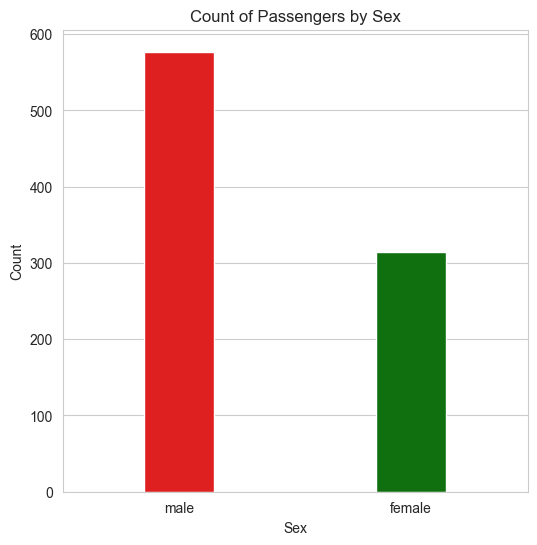

In [140]:
# Set figure size to control bar size
plt.figure(figsize=(6, 6))  # Adjust the width and height as needed

# Create the countplot
sns.countplot(x='sex', data=titanic, width=0.3, hue='sex', palette={'male': 'red', 'female': 'green'})

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Passengers by Sex')

# Show plot
plt.show()

A) How does the distribution of ages vary among different passenger classes on the Titanic, and what insights can we gain about the age demographics of each class based on the boxplot?

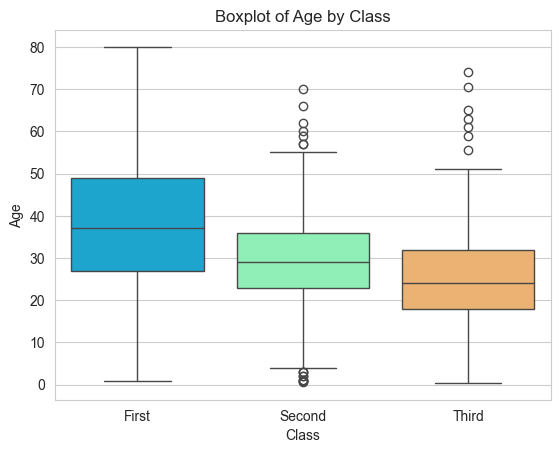

In [142]:

sns.boxplot(x='class', y='age', data=titanic, hue='class', palette='rainbow', legend=False)
# Add labels and title
plt.xlabel('Class')
plt.ylabel('Age')
plt.title('Boxplot of Age by Class')

# Show plot
plt.show()

In [143]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


A)What does the box plot reveal about the distribution of ages for passengers who survived versus those who did not on the Titanic?

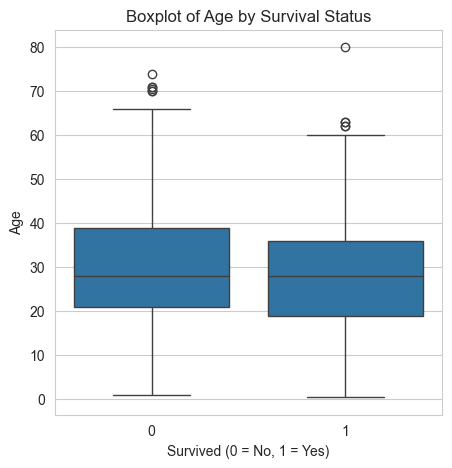

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

#Proportion of target (Survived)
titanic.groupby('survived').count()
## Create the figure and axes object, setting the figure size
f, ax = plt.subplots(figsize=(5, 5))

# Create the boxplot of Age by Survival status
sns.boxplot(x='survived', y='age', data=titanic, ax=ax)

# Add labels and a title for clarity
ax.set_title('Boxplot of Age by Survival Status')
ax.set_xlabel('Survived (0 = No, 1 = Yes)')
ax.set_ylabel('Age')

# Show the plot
plt.show()

A) How does the age distribution differ between male and female passengers on the Titanic, and what insights can be drawn regarding survival rates based on gender through the box plot

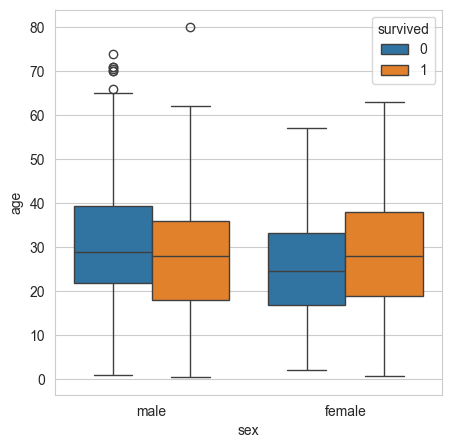

In [100]:
f, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x="sex", y="age", hue="survived", data=titanic);

Q) What does the bar plot reveal about the survival rates of different passenger classes on the Titanic, and how do these rates vary between male and female passengers

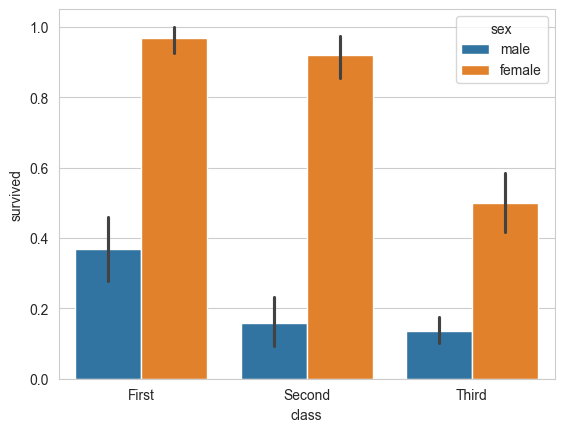

In [145]:
sns.barplot(x="class", y="survived",hue="sex", data=titanic);

Q) What does the count plot interpret about the distribution of passengers on the Titanic by demographic categories (men, women, and children)

/tmp/ipykernel_100267/2818932193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='who', data=titanic, palette=palette, kind='count')
/tmp/ipykernel_100267/2818932193.py:5: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.catplot(x='who', data=titanic, palette=palette, kind='count')


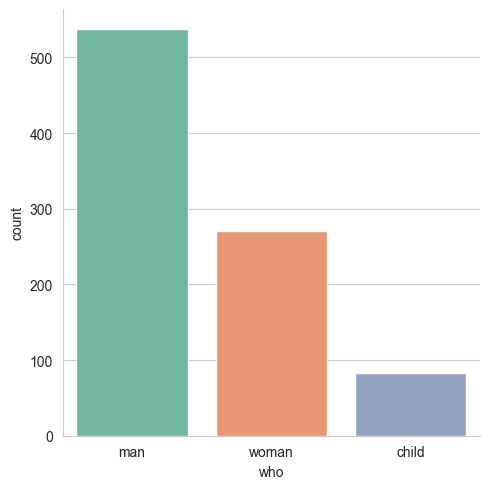

In [114]:
# Set the color palette
palette = sns.color_palette('Set2')
# Create the catplot (formerly factorplot)
sns.catplot(x='who', data=titanic, palette=palette, kind='count')

Q) What does the distribution of ages for the survivors of the Titanic reveal about the age demographics of those who survived the disaster?

/tmp/ipykernel_100267/577596313.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived)


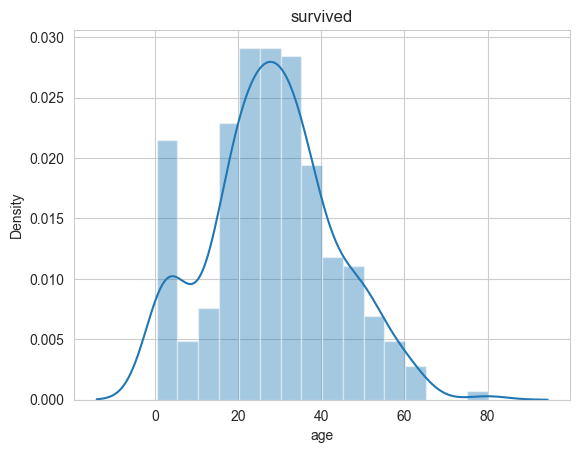

In [146]:
survived = titanic.loc[titanic['survived']==1,"age"].dropna()
sns.distplot(survived)
plt.title("survived");

Q) What does the distribution of ages for passengers who did not survive the Titanic reveal about the age demographics of those who perished in the disaster?

/tmp/ipykernel_100267/2340840298.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_survived)


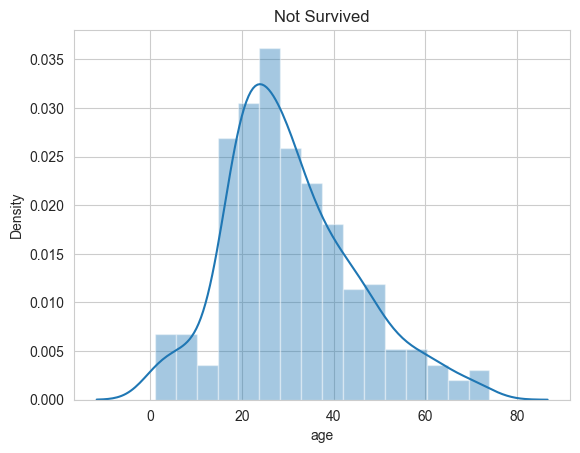

In [147]:
not_survived = titanic.loc[titanic['survived']==0,"age"].dropna()
sns.distplot(not_survived)
plt.title("Not Survived");

Q) How does the kernel density estimate (KDE) plot of age distribution for male and female passengers on the Titanic illustrate differences in survival based on gender?

/home/saja/Desktop/dataAI3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/saja/Desktop/dataAI3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


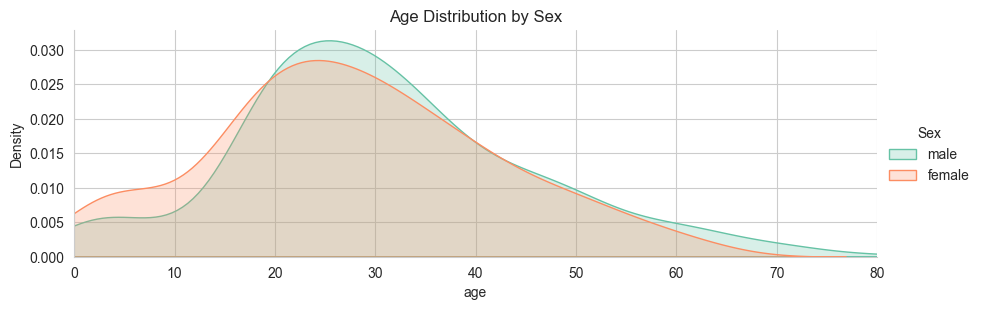

In [116]:
# Define a color palette
palette = sns.color_palette('Set2')  # or any other palette you prefer

# Create the FacetGrid
fg = sns.FacetGrid(titanic, hue="sex", aspect=3, palette=palette)

# Map the KDE plot
fg.map(sns.kdeplot, "age", shade=True)

# Set x limits for the plot
fg.set(xlim=(0, 80))

# Add a title and legend
fg.add_legend(title='Sex')
plt.title('Age Distribution by Sex')

# Show the plot
plt.show()

In [148]:
Q) What does the violin plot show about the distribution of ticket fares across different passenger classes on the Titanic?

Object `Titanic` not found.


/tmp/ipykernel_100267/907711102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class', y='fare', data=titanic, palette='BuPu')


Text(0, 0.5, 'Fare')

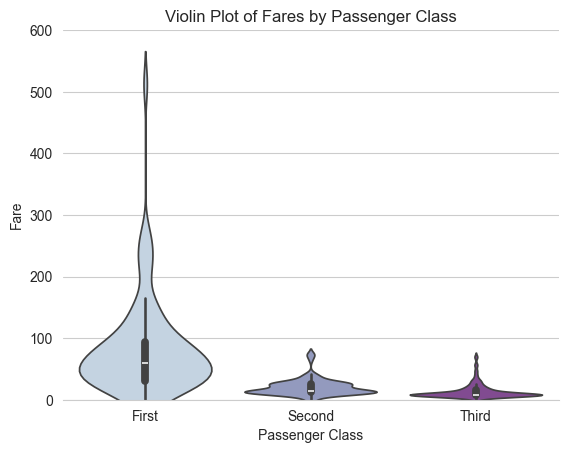

In [149]:
# Create the violin plot
sns.violinplot(x='class', y='fare', data=titanic, palette='BuPu')

# Set the y-axis limits
plt.ylim(0, 600)

# Remove the left spine for aesthetics
sns.despine(left=True)

plt.title('Violin Plot of Fares by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

Q) What does the regression plot of fare against age reveal about the relationship between these two variables among Titanic passengers?

Text(0, 0.5, 'Fare')

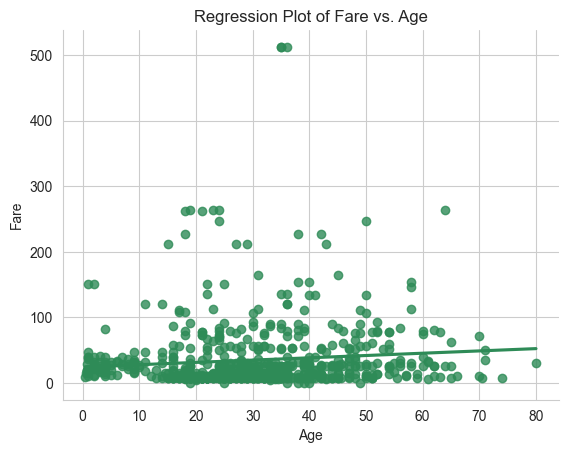

In [150]:
# Create the regression plot without robust=True
sns.regplot(x="age", y="fare", data=titanic, ci=None, color="seagreen")

# Remove the top and right spines for aesthetics
sns.despine()
plt.title('Regression Plot of Fare vs. Age')
plt.xlabel('Age')
plt.ylabel('Fare')

Q) What insights can be drawn from the pair plot of the Titanic dataset regarding the relationships between multiple numerical features?

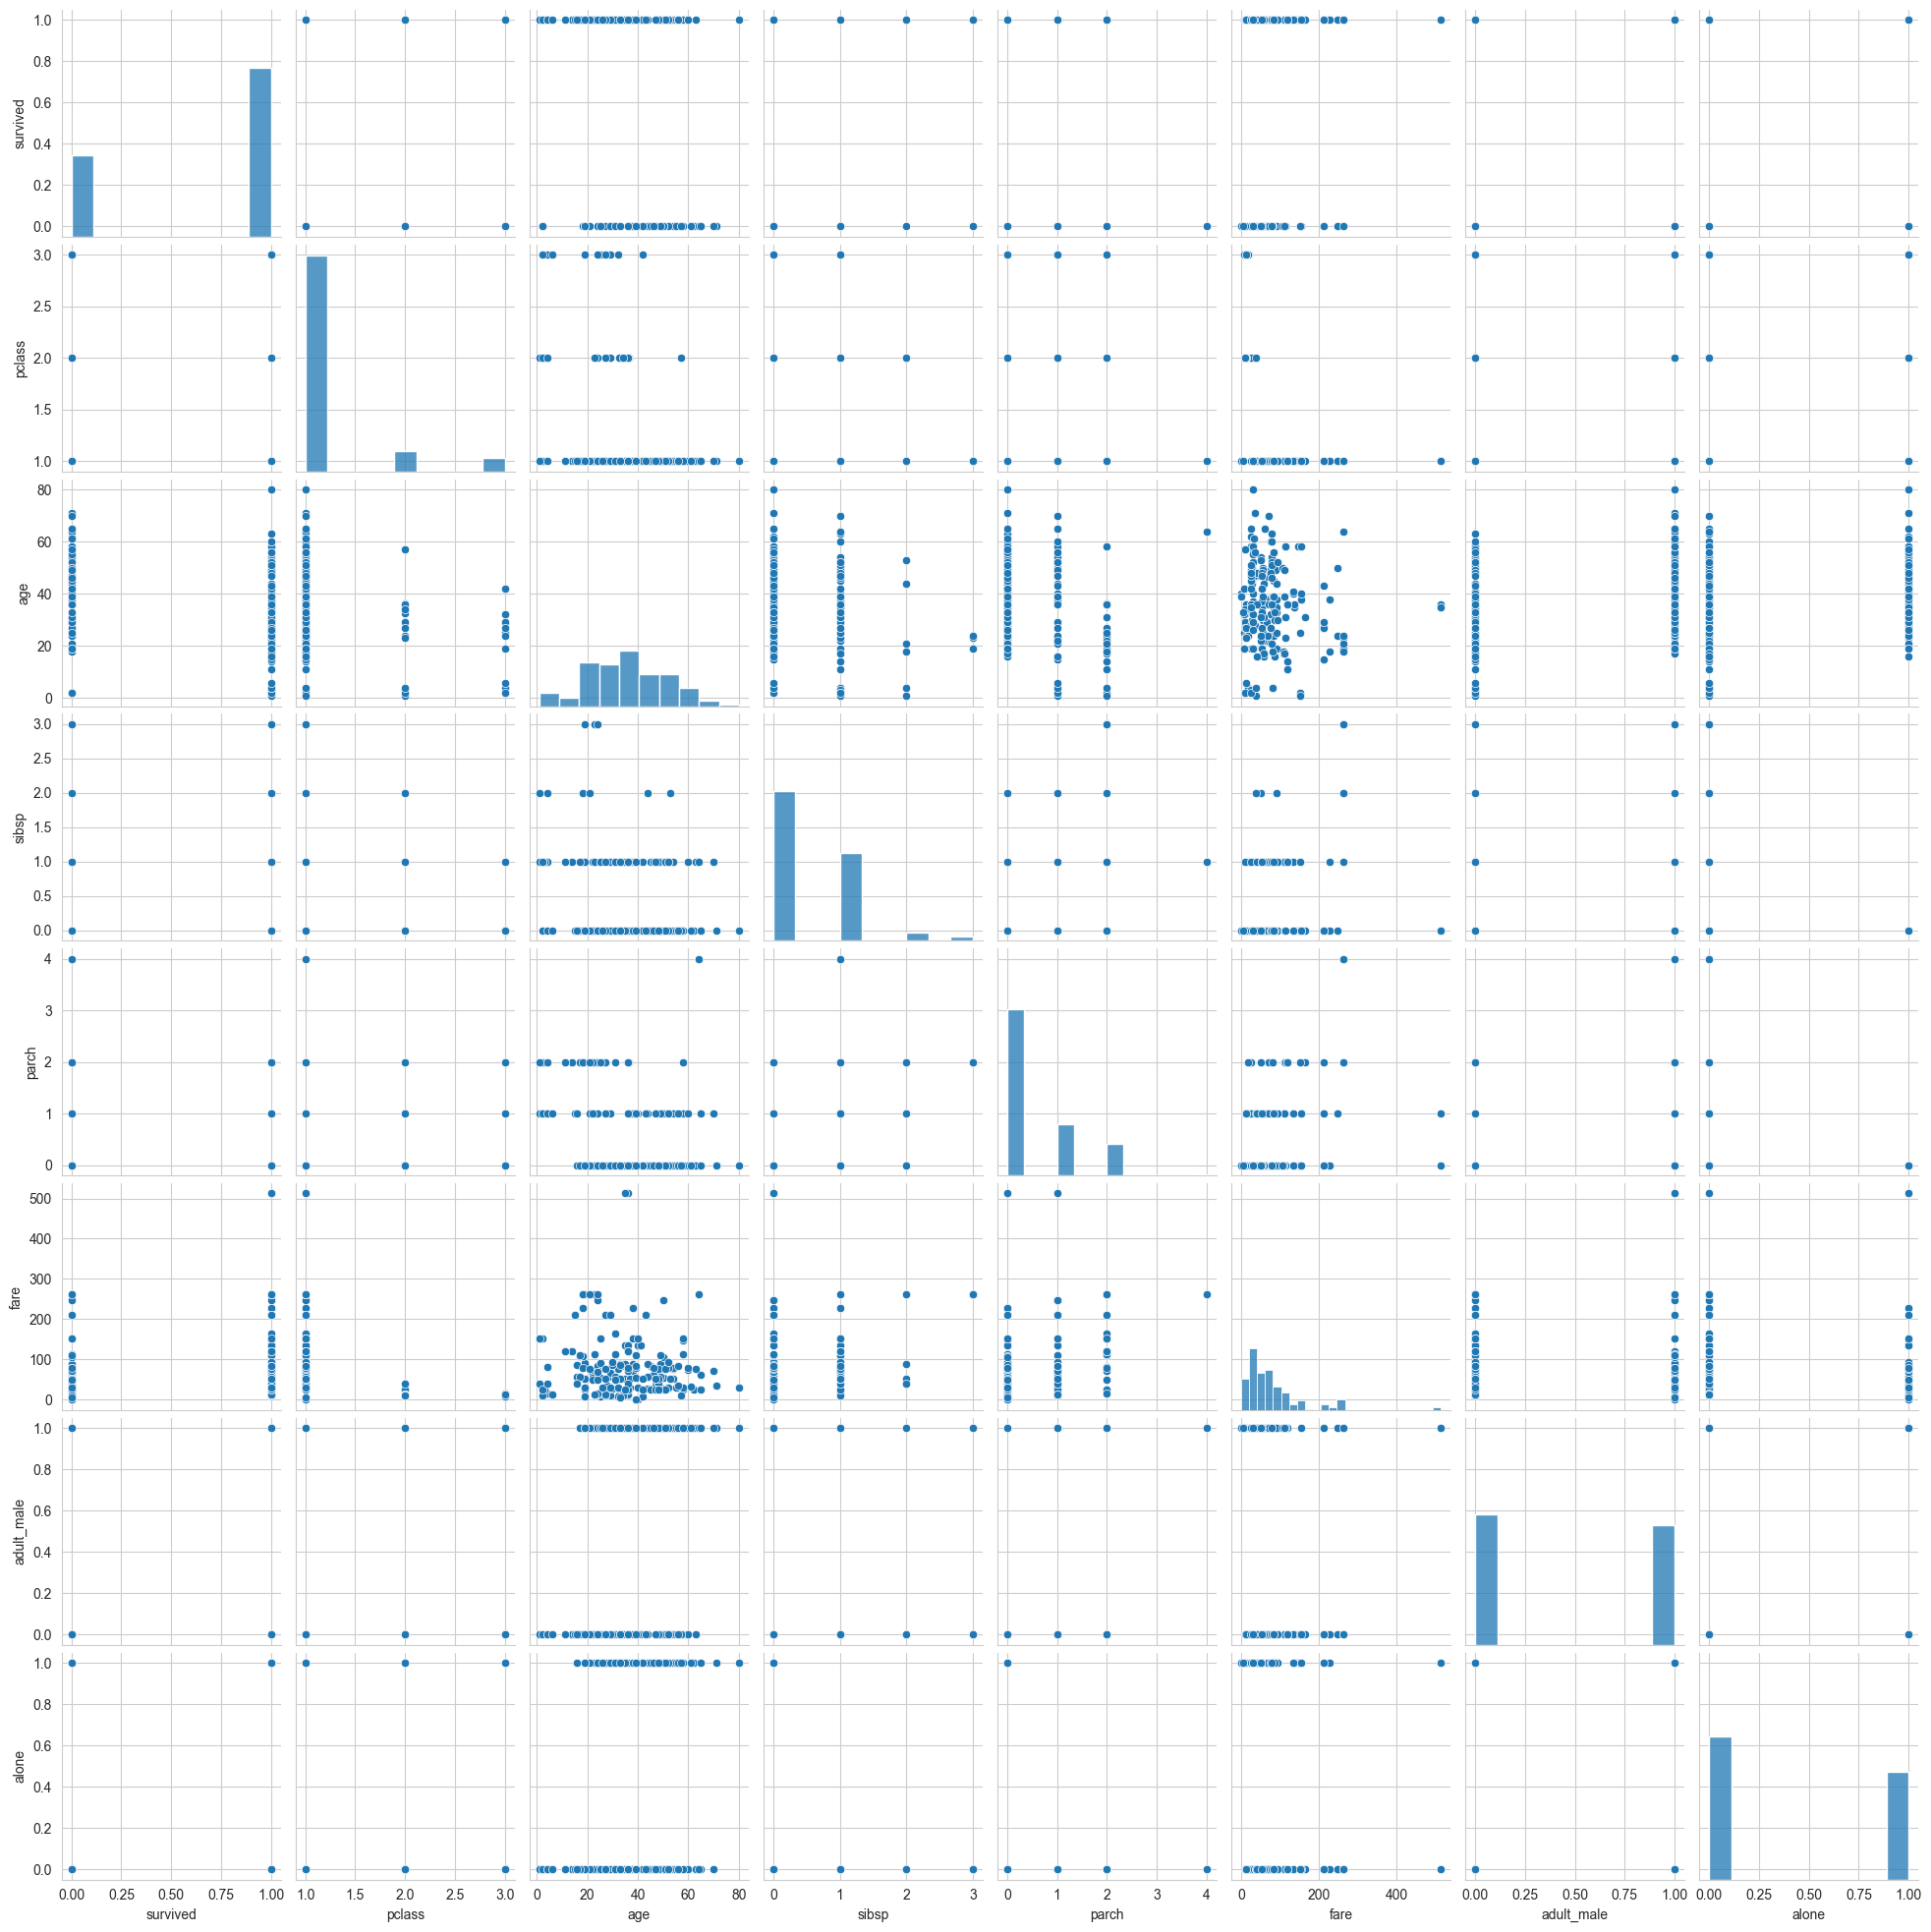

In [151]:
sns.pairplot(titanic.dropna());

Q) You should create a pair plot for visualizing relationships between numerical variables in the Titanic dataset, with color coding based on the pclass variable (passenger class)

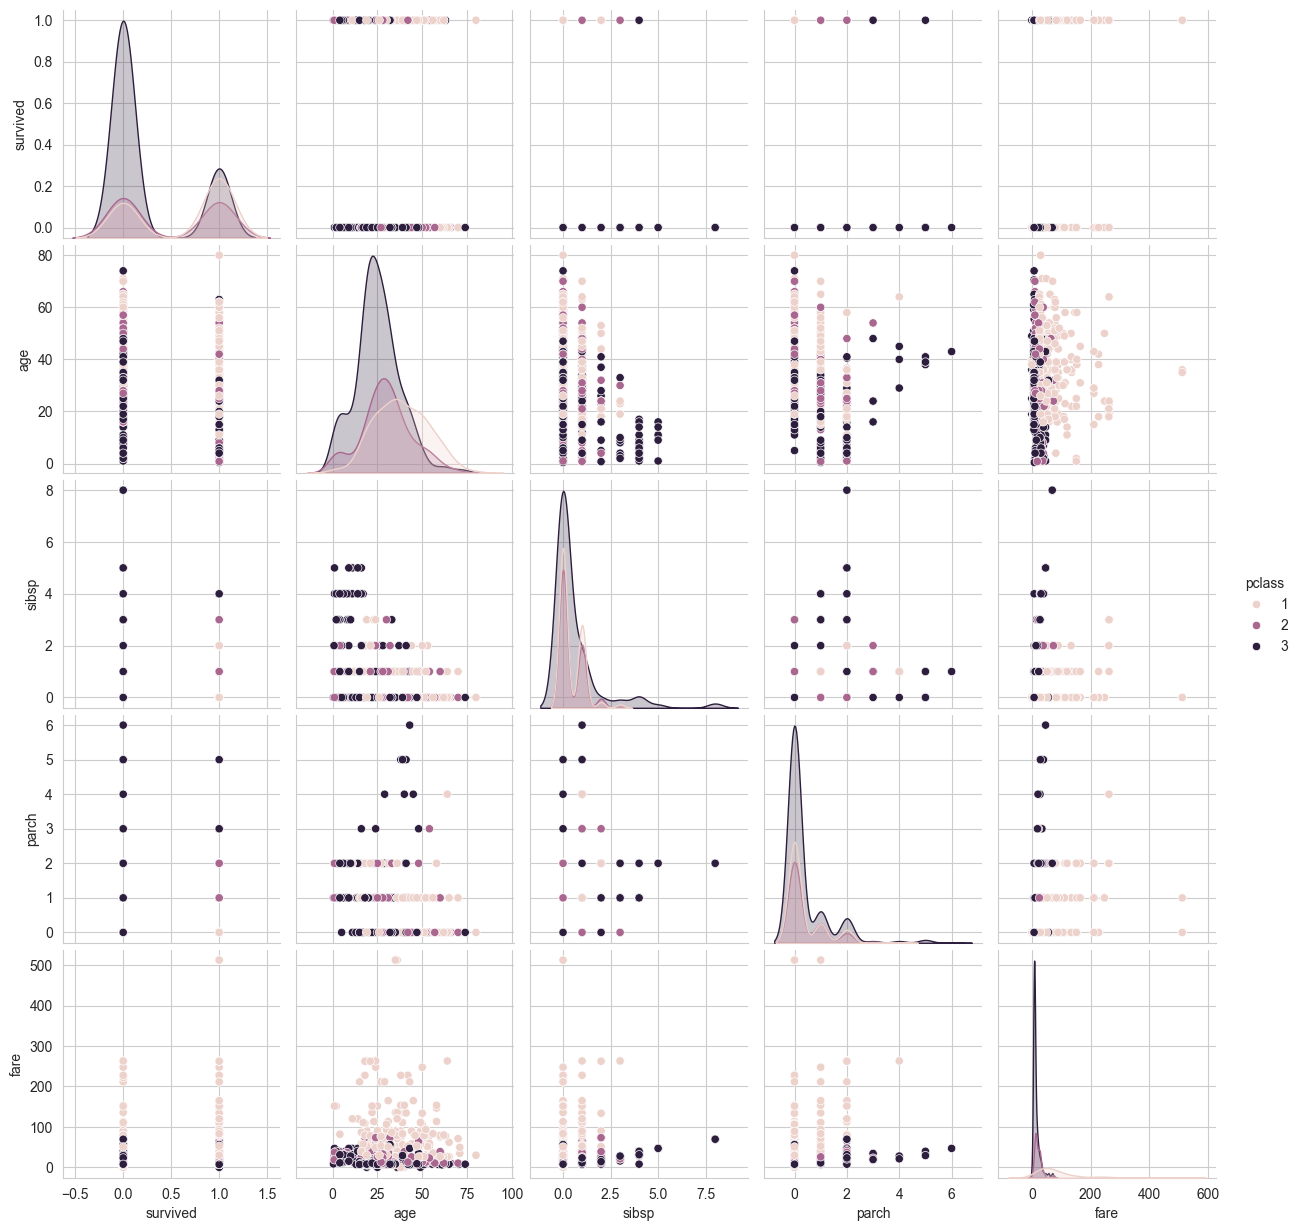

In [73]:

sns.pairplot(titanic.select_dtypes(['number']), hue="pclass")


## Customizing Colorbars

Q) You should create an informative scatter plot with a customized colorbar to represent categorical data in the Titanic dataset.
    
    - For example you can show Scatter Plot of Age vs. Fare Colored by Passenger Class.
    
    - OR ( Be creative!  )

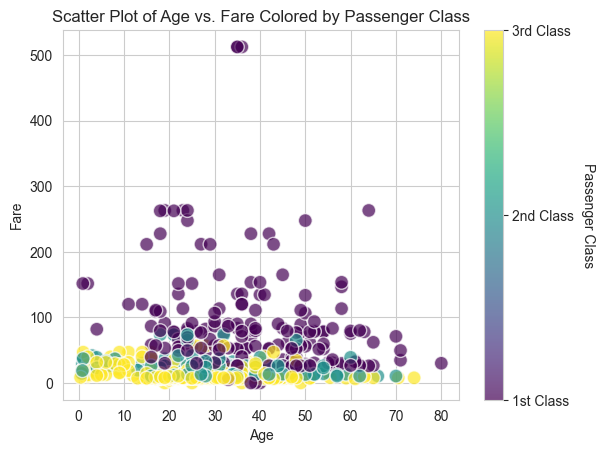

In [153]:
# Use a colormap to map pclass to colors
scatter = plt.scatter(
    data=titanic, 
    x='age', 
    y='fare', 
    c='pclass',          # Use passenger class for coloring
    cmap='viridis',      # Custom colormap
    alpha=0.7,          # Set transparency
    edgecolor='w',      # White edge color for better visibility
    s=100                # Size of the points
)

# Customize the colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Passenger Class', rotation=270, labelpad=15)  # Label for the colorbar
cbar.set_ticks([1, 2, 3])  # Specify the ticks
cbar.ax.set_yticklabels(['1st Class', '2nd Class', '3rd Class'])  # Custom labels for ticks

# Set the title and labels
plt.title('Scatter Plot of Age vs. Fare Colored by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Fare')

# Show the plot
plt.show()